<a href="https://colab.research.google.com/github/scudilio/Churn_model/blob/master/wids_talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WiDS: Como utilizar modelos de Machine Learning para prevenir o Churn**


O Churn é um indicativo de gestão da empresa e controlá-lo se faz necessário para evitar problemas futuros. 

Uma das maneiras que podemos diminuir o Churn é prever quais clientes têm mais risco de evasão. Assim, conseguimos tomar medidas preventivas.

 Modelos de Machine Learning são técnicas poderosa para esse fim, ao utilizar essa ferramenta, você poderá descobrir com facilidade aqueles clientes que têm um risco maior de Churn.

Nesse artigo iremos continuar a análise do conjunto de dados de uma agência bancária, apresentado no último artigo.

Essa série de artigo foi dividida em 6 etapas:

1.   Entendimento do Problema
2.   Obtenção dos dados
3.   Análise Exploratória dos dados
4.   Pré-processamento
5.   Modelos de Machine Learning
6.   Avaliação do modelo 





# **Coletando os dados**

Os dados utilizados aqui foram extraídos do Kaggle e são dados de clientes de uma agência bancária. Utilizaremos o Google Colab para fazer as análises.



In [ ]:
url = "https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv"

**Importando os dados**

Importando a biblioteca pandas para processar os dados.

In [ ]:
import pandas as pd

In [ ]:
##IMPORTANDO ARQUIVOS
#escrevendo em um arquivo csv
df= pd.read_csv(url)
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


No conjunto de dados temos as seguinte variáveis:

* CustomerId: identificação do cliente;
* Surname: sobrenome do clientes;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade. 
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).


No artigo anterior concluimos que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

Nesse artigo iremos implementar um modelo de Churn para prever os clientes com um alto risco de Churn.



In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **4. Pré-Processamento dos dados**

Nessa seção precisamos transformar as variáveis para utilizá-las nos modelos de Machine Learning. Teremos as seguintes etapas

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados missing;
* Separação das variáveis categóricas, numéricas e resposta;
* Processamento variáveis categóricas;
* Processamento variáveis numéricas.

##**A. Eliminar as variáveis que não serão utilizadas**

Em conjunto de dados reais é comum existir variáveis que não tem utilidade prática, por exemplo, as variáveis 'RowNumber' (número da linha) e 'CustomerId'(ID do Cliente) não trazem informações relevantes para entender o Churn de clientes. 
Assim, iremos eliminar essas variáveis utilizando a função drop().

In [ ]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##**B. Identificando dados faltantes**

Nada é perfeito nesse mundo e na análise de dados isso também é verdade. Dados faltantes, ou dados missing, são comuns em dados reais, isso spode ocorrer por vários motivos.

Por exemplo, a pessoa que fez o cadastro esqueceu de preencher essa informação, ou a dona da conta não tinha essa informação quando fez o cadastro, ou simplesmente essa informação era desconhecida.

Assim para identificar a presença de dados faltantes no conjunto de dados, utilizamos os comandos a seguir

In [ ]:
#Contato número de observações faltantes no dataset para cada variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observamos que nenhuma variável em estudo apresenta dados faltantes, dados missing. Assim, não teremos o processo de tratamento dos dados faltantes. 

##**C. Separando as variáveis**

No modelos de Machine Learning temos a variável dependente (variável resposta) que queremos prever, no nosso caso é a variável 'Exited'. E as covariáveis (variáveis independentes) que são as variáveis que irá explicar o Churn. 

Para não modificar a variável resposta (target) durante o pré-processamento, iremos separá-la das outras variáveis do dataset.


In [ ]:
#Criando variaveis independentes e dependentes

y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


###**Separando as variáveis numéricas das categóricas**

Variáveis numéricas são aquelas variáveis que assumem valores numéricos, por exemplo a variável idade. As variáveis numéricas são classificadas como variaveis contínuas ou discreta. 

As variáveis contínuas assumem valores na reta real, como a variável Salário Estimado. E as variáveis discretas são aquelas que assumem valores inteiros, como a variável número de produtos.

Variáveis categóricas são variáveis que não assumem valores numéricos. Por exemplo, a variável país. 

As variáveis categóricas são classificadas como nominais e ordinais. As variáveis categóricas nominais são aquelas que não tem nenhuma ordem envolvida, por exemplo, a variável sexo e ordinais quando temos uma ordem envolvida, como a variável grau de escolaridade. 

No pré processamento dos dados separamos as variáveis entre categóricas e numéricas, pois para cada tipo de variável utilizamos técnicas de processamento diferentes.



In [ ]:
#Variáveis Continuas
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [ ]:
#Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,IsActiveMember,NumOfProducts,Geography,Gender,HasCrCard
0,1,1,France,Female,1
1,1,1,Spain,Female,0
2,0,3,France,Female,1
3,0,2,France,Female,0
4,1,1,Spain,Female,1
...,...,...,...,...,...
9995,0,2,France,Male,1
9996,1,1,France,Male,1
9997,1,1,France,Female,0
9998,0,2,Germany,Male,1




##**D.Processamento das variáveis categóricas**

Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas. 

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

 Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

In [ ]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


Para as variáveis categóricas com mais categorias, utilizaremos o método get_dummies(). Esse método transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui 0 e 1s.

Por exemplo, a variável país possuí três categorias, França, Espanha e Alemanha. A função get_dummies() transforma cada categoria em uma nova variável binária, ou seja, 
* Variável França: se o cliente for da França 1 e 0 caso contrário.
* Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
* Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.

Observe o conjunto de dados após aplicar a função get_dummies().


In [ ]:
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


Observe que a variável país agora tem 3 colunas, para cada país temos uma coluna com valores 0 ou 1. Onde 1, significa que pertence aquele país.

##**E. Variáveis Numéricas**

Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.


Para resolver esse problemas utilizaremos o método MiniMax para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.


O método MiniMax é definido como 

valor_padronizado = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

Aqui utilizaremos uma função MinMaxScaler() do pacote sklearn.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


# **5.Modelo de Churn**

Após o pré processamento, o conjunto de dados está pronto para a modelagem.
Prever o Churn de clientes é um problema de classificação binária, 1 se Churn e 0 caso contrário.


 Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost. Lembre-se a variável resposta Exited tem apenas 20% de valores 1. E por isso escolhemos modelos que não sofrem tanta influência dos dados desbalanceado.

#**Validação Hold-Out**

Para analisar a capacidade de generalização do modelo é importante separar o dataset em conjunto de dados de treino e dados de teste. O conjunto de dados de treino utilizamos para treinar o modelo e utilizaremos 75% dos conjunto de dados para isso.

O conjunto de dados de teste utilizamos para analisar o quanto o modelo está acertando para prever as classes, 1 para Churn e 0 caso contrário. Essa etapa é necessária, para analisar como nosso modelo se comporta em dados desconhecidos.

A figura, a seguir, exemplifica o método holdout, onde temos os dados e dividimos em duas partes, uma para treinar o modelo e outra para testar o modelo em dados desconhecidos.


In [ ]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

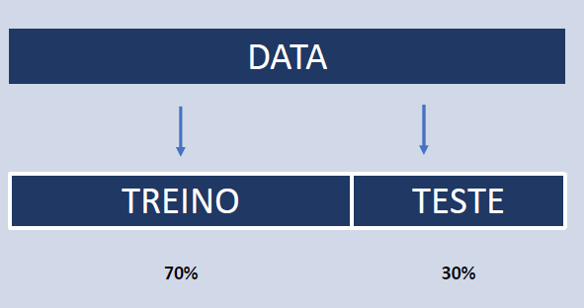

In [ ]:
Image('holdout.png')

In [ ]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


##**Modelo KNN** 

Modelo mais simples de aprendizado supervisiona, mas nem por isso ele perde em relação ao seu desempenho. 

KNN ou k-vizinhos mais próximo utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.

Para facilitar o entendimento, ilustramos o método através de um exemplo, figura a seguir. O interesse é prever se o círculo verde é um triângulo vermelho ou um quadrado azul.

Primeiro, escolhemos o número de k vizinhos, k precisa ser um número inteiro e impar. Depois medimos a distância da nova observação (círculo verde) com os pontos do dataset (triângulos e quadrados).  

Para finalizar, ordenamos as distâncias e escolhemos os k pontos mais próximos, se a maioria dos pontos mais próximos forem da categoria triãngulo vermelho, o ponto verde será classificado como triângulo, caso contrário será quadrado.

Observe que o método é bem influenciado pela escolha do K. Se escolhemos k=3, o círculo será classificado como triângulo vermelho. Se K=5, o círculo será classificado como quadrado azul.

Além disso, o algoritmo KNN, diferente dos outros algoritmos, tem seu poder computacional utilizado na amostra teste, quando precisamos prever uma nova observação e não para ajustar o modelo. Visto que as distâncias entre as observações só será calculada, quando incluímos uma nova observação.

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving 800px-KnnClassification.svg.png to 800px-KnnClassification.svg.png


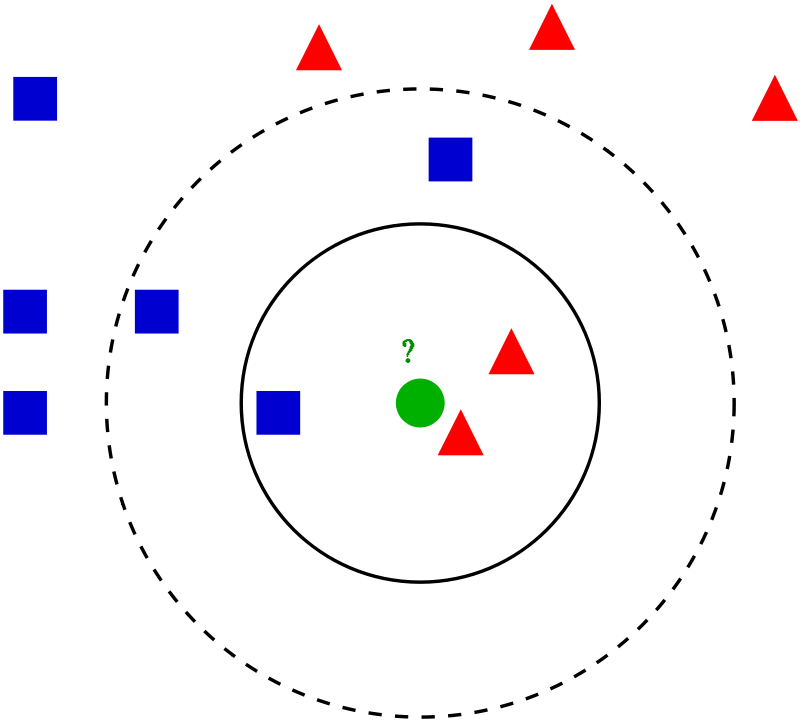

In [ ]:
Image('800px-KnnClassification.svg.png',width=300)

Para ajustar o modelo KNN precisamos rodar duas linhas de código

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1914   66  1980
1         361  159   520
All      2275  225  2500


Primeiramente utilizamos o K=5 que é default da função Knn do pacote sklearn, como comentado anteriormente, o valor de k influência bastante a estimação das classe. Observe, que utilizando k=5, temos muitos erros de predição.

Assim precisamos encontrar o melhor k para esses dados.

* **Encontrando o melhor K**
Para encontrar o melhor K, ajustaremos varios modelos variando o número de K, aquele modelo que retornar o menor erro de predição é o modelo com K ideal



In [ ]:
import numpy as np #manipulação algebricas

error = []

# Calcular erro para valores de K entre 1 e 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))

Na função acima, ajustei o modelo para diferentes k, variando k de 1 a 40. E depois calculei o número de erros de classificação e tirei a média, erro médio. A seguir, vou plotar os erros de predição para os diferentes k e aquele k com o menor erro, será o ajuste ideal.






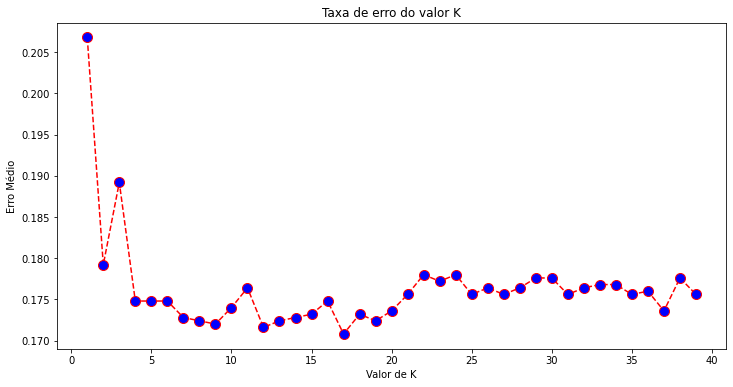

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio');

O melhor k=17, assim iremos ajustar novamente o modelo KNN considerando K=17.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

* **Previsão na amostra teste e matriz de confusão**

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1914   66  1980
1         361  159   520
All      2275  225  2500


Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

## **Métricas de Validação**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, resultado_knn))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1980
           1       0.71      0.31      0.43       520

    accuracy                           0.83      2500
   macro avg       0.77      0.64      0.66      2500
weighted avg       0.81      0.83      0.80      2500



In [ ]:
df['proba'] = knn.predict_proba(x_final[x_treino.columns])[:,1] #prob classe 1
df[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.235294
1,15647311,0.352941
2,15619304,0.882353
3,15701354,0.058824
4,15737888,0.117647
...,...,...
9995,15606229,0.000000
9996,15569892,0.058824
9997,15584532,0.176471
9998,15682355,0.235294


Agora temos a probabilidade do cliente dar Churn e podemos criar ações com base nisso. 
